In [1]:
#creating bar graph

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ipywidgets as widgets
from sklearn.model_selection import train_test_split

In [3]:
x=pd.read_csv("c:/users/anany/desktop/JupyterN/data/loan.csv")

C:\Users\anany\AppData\Local\Temp\ipykernel_28100\888742273.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  x=pd.read_csv("c:/users/anany/desktop/JupyterN/data/loan.csv")


In [4]:
x.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
x.shape

(39717, 111)

In [6]:
x.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
x.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
x.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [9]:
#finding percentage of data that is null
x.isnull().sum()/len(x.index)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [10]:
#dropping member id
x=x.drop(["member_id"], axis=1)

In [11]:
#Dropping columns with all NA values
x=x.dropna(how="all",axis=1)
x.shape

(39717, 56)

In [12]:
#dropping the columns which has more than 30% NULL values
x=x.drop(columns=x.columns[x.isnull().sum()/len(x.index)*100>30],axis=1)

In [13]:
x.shape

(39717, 52)

In [14]:
x

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,171.62,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,119.66,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,649.91,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,67.79,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,80.90,10-Jun,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,281.94,10-Jul,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,0.00,07-Jun,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,...,0.00,07-Jun,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [15]:
#number of unique number of columns 
x.nunique()

id                            39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19614
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                     

In [16]:
#dropping the rows with NA values
x=x.dropna()

In [17]:
x.shape

(36431, 52)

In [18]:
#list the unique values of the list
x["pymnt_plan"].unique().tolist()

['n']

In [19]:
x["application_type"].unique().tolist()

['INDIVIDUAL']

In [20]:
x["loan_status"].unique().tolist()

['Charged Off', 'Fully Paid', 'Current']

In [21]:
x["home_ownership"].tolist()

['RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'OWN',
 'OWN',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'MORTGAGE',
 'MORTGAGE',
 'RENT',
 'RENT',
 'RENT',
 'OWN',
 'RENT',
 'RENT',
 'MORTGAGE',
 'RENT',
 'MORTGAGE',
 'RENT',
 'MORTGAGE',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'MORTGAGE',
 'RENT',
 'MORTGAGE',
 'RENT',
 'RENT',
 'RENT',
 'MORTGAGE',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'OWN',
 'RENT',
 'MORTGAGE',
 'MORTGAGE',
 'RENT',
 'RENT',
 'RENT',
 'MORTGAGE',
 'RENT',
 'RENT',
 'RENT',
 'OWN',
 'MORTGAGE',
 'RENT',
 'RENT',
 'RENT',
 'OWN',
 'RENT',
 'MORTGAGE',
 'RENT',
 'MORTGAGE',
 'MORTGAGE',
 'MORTGAGE',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 'MORTGAGE',
 'RENT',
 'RENT',
 'RENT',
 'MORTGAGE',
 'RENT',
 'RENT',
 'OWN',
 'RENT',
 'MORTGAGE',
 'MORTGAGE',
 'MORTGAGE',
 'RENT',
 'RENT',
 'RENT',
 'OWN',
 'RENT',
 'MORTGAGE',
 'RENT',
 'RENT',
 'RENT',
 'RENT',
 '

In [22]:
x["loan_status"].tolist()

['Charged Off',
 'Fully Paid',
 'Current',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Current',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Current',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Fully Paid',
 'Charged Off',
 'Fully Paid',
 'Fu

<function matplotlib.pyplot.show(close=None, block=None)>

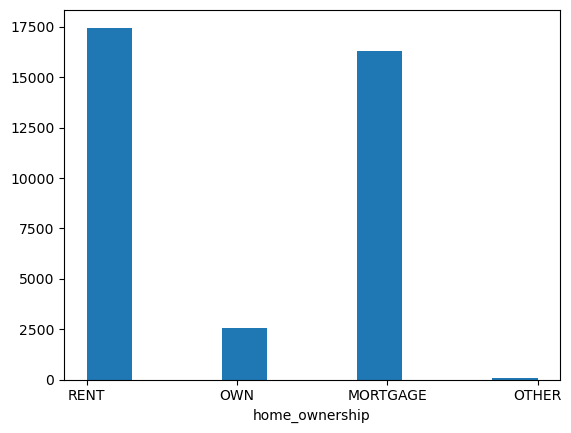

In [23]:
plt.hist(x["home_ownership"], bins=10)
plt.xlabel("home_ownership")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

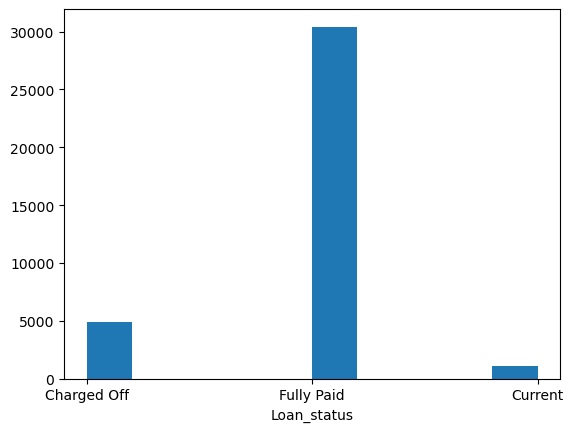

In [24]:
plt.hist(x["loan_status"], bins=10)
plt.xlabel("Loan_status")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

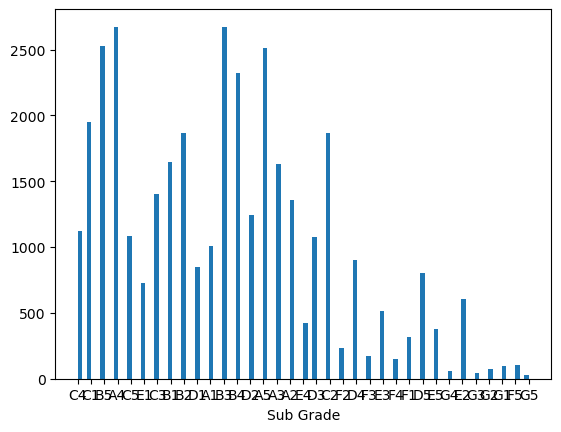

<Figure size 10000x10000 with 0 Axes>

In [34]:
plt.hist(x["sub_grade"], bins=100)
plt.xlabel("Sub Grade")
plt.figure(figsize=(100,100),facecolor='red',edgecolor='blue')
plt.show